Set font

In [1]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

1.Transformer without Data Augmentation

     Experimental Value  Predicted Value        MAE
224               576.0        346.18430  229.81570
49                526.0        341.72340  184.27660
173               454.0        283.88312  170.11688
116               473.0        307.45700  165.54300
105               188.0        344.39470  156.39470
13                589.5        438.80414  150.69586
175               405.5        255.77177  149.72823
119               374.0        232.37553  141.62447
65                386.5        245.75272  140.74728
236               515.0        376.75555  138.24445


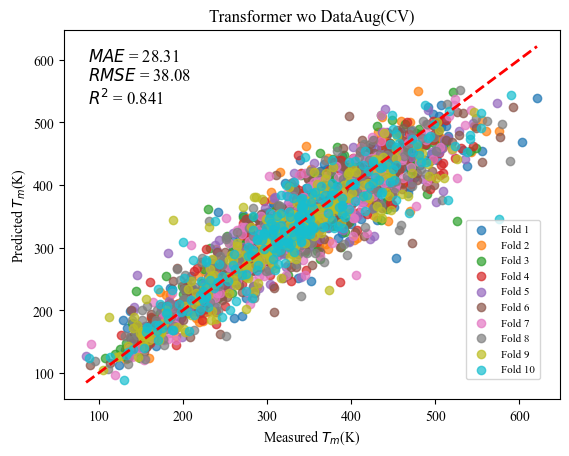

In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


df = pd.DataFrame()
for i in range(1, 11):
    filename = f"training_results/MP/TF WO DA/fold_{i}_predictions_tf.csv"
    fold_df = pd.read_csv(filename)
    df = pd.concat([df, fold_df])


mae = mean_absolute_error(df['Experimental Value'], df['Predicted Value'])
rmse = np.sqrt(mean_squared_error(df['Experimental Value'], df['Predicted Value']))
r2 = r2_score(df['Experimental Value'], df['Predicted Value'])

df['MAE'] = abs(df['Experimental Value'] - df['Predicted Value'])
df_sorted = df.sort_values('MAE', ascending=False)
top_10_mae = df_sorted.head(10)
print(top_10_mae)

fig, ax = plt.subplots()
for i in range(1, 11):
    fold_df = pd.read_csv(f"training_results/MP/TF WO DA/fold_{i}_predictions_tf.csv")
    ax.scatter(fold_df['Experimental Value'], fold_df['Predicted Value'], label=f'Fold {i}', alpha=0.7)

ax.plot([df['Experimental Value'].min(), df['Experimental Value'].max()],
        [df['Experimental Value'].min(), df['Experimental Value'].max()], 'r--', lw=2)

ax.set_xlabel('Measured $T_m$(K)')
ax.set_ylabel('Predicted $T_m$(K)')
ax.text(0.05, 0.95, f"$MAE$ = {mae:.2f}\n$RMSE$ = {rmse:.2f}\n$R^2$ = {r2:.3f}", fontsize=12, transform=ax.transAxes, verticalalignment='top')
ax.set_title('Transformer wo DataAug(CV)')
ax.legend(bbox_to_anchor=(0.8, 0.5), fontsize=8)

plt.savefig('TF WO DA(MP_CV).png', dpi=600)  
plt.show()


     Experimental Value  Predicted Value        MAE
296               615.0        459.98480  155.01520
542               631.0        498.24410  132.75590
203               493.0        360.27383  132.72617
474               557.0        431.78710  125.21290
123               469.5        344.37450  125.12550
284               551.0        429.43000  121.57000
168               491.0        374.66977  116.33023
118               533.5        422.24072  111.25928
477               554.0        442.90103  111.09897
374               293.5        403.81480  110.31480


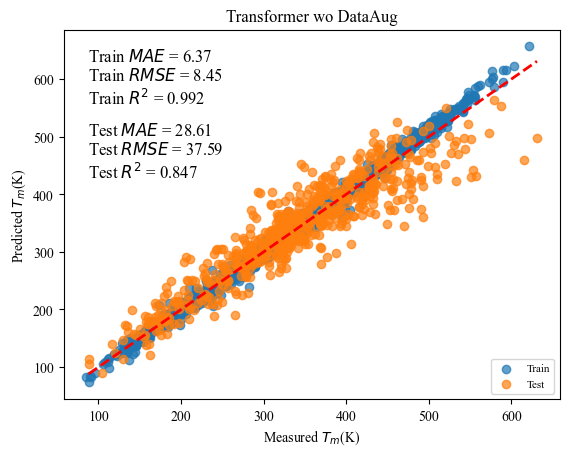

In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


df_train = pd.read_csv('training_results/MP/TF WO DA/traindata_predictions_tf.csv')
df_test = pd.read_csv('training_results/MP/TF WO DA/testdata_predictions_tf.csv')


mae_train = mean_absolute_error(df_train['Experimental Value'], df_train['Predicted Value'])
rmse_train = np.sqrt(mean_squared_error(df_train['Experimental Value'], df_train['Predicted Value']))
r2_train = r2_score(df_train['Experimental Value'], df_train['Predicted Value'])

mae_test = mean_absolute_error(df_test['Experimental Value'], df_test['Predicted Value'])
rmse_test = np.sqrt(mean_squared_error(df_test['Experimental Value'], df_test['Predicted Value']))
r2_test = r2_score(df_test['Experimental Value'], df_test['Predicted Value'])


df_test['MAE'] = abs(df_test['Experimental Value'] - df_test['Predicted Value'])
df_sorted = df_test.sort_values('MAE', ascending=False)
top_10_mae = df_sorted.head(10)
print(top_10_mae)


fig, ax = plt.subplots()
ax.scatter(df_train['Experimental Value'], df_train['Predicted Value'], label='Train', alpha=0.7)
ax.scatter(df_test['Experimental Value'], df_test['Predicted Value'], label='Test', alpha=0.7)

ax.plot([df_test['Experimental Value'].min(), df_test['Experimental Value'].max()],
        [df_test['Experimental Value'].min(), df_test['Experimental Value'].max()], 'r--', lw=2)

ax.set_xlabel('Measured $T_m$(K)')
ax.set_ylabel('Predicted $T_m$(K)')
ax.text(0.05, 0.95, f"Train $MAE$ = {mae_train:.2f}\nTrain $RMSE$ = {rmse_train:.2f}\nTrain $R^2$ = {r2_train:.3f}", fontsize=12, transform=ax.transAxes, verticalalignment='top')
ax.text(0.05, 0.75, f"Test $MAE$ = {mae_test:.2f}\nTest $RMSE$ = {rmse_test:.2f}\nTest $R^2$ = {r2_test:.3f}", fontsize=12, transform=ax.transAxes, verticalalignment='top')
ax.set_title('Transformer wo DataAug')
ax.legend(loc='lower right', fontsize=8)

plt.savefig('TF WO DA(MP_test).png', dpi=600)  
plt.show()


2.Transformer with Data Augmentation

      Experimental Value  Predicted Value
0                  160.0       177.147047
1                  372.5       322.751232
2                  328.0       330.113619
3                  239.0       259.839842
4                  284.0       282.368796
...                  ...              ...
2425               228.0       233.965924
2426               416.0       397.150274
2427               324.0       380.170651
2428               492.0       490.849672
2429               340.0       343.082424

[2430 rows x 2 columns]


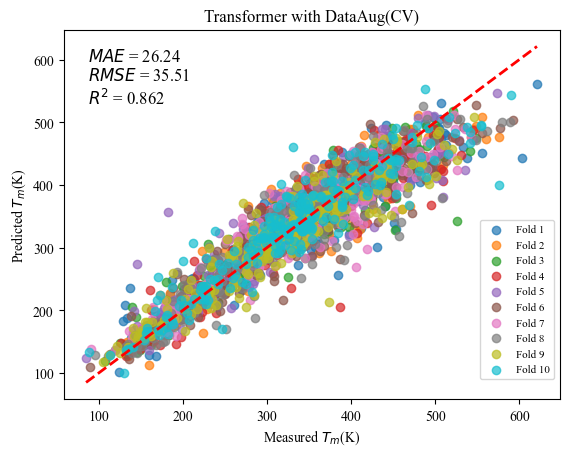

In [11]:

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

final_data = pd.DataFrame(columns=['Experimental Value', 'Predicted Value'])

for i in range(1, 11):
    filename = f"training_results/MP/TF W DA/fold_{i}_predictions_tf.csv"
    df = pd.read_csv(filename)
    grouped_df = df.groupby(df.index // 10)  
    group_data_list = []
    for _, group_data in grouped_df:
        experimental_value = group_data['Experimental Value'].iloc[0]  
        mean_predicted_value = group_data['Predicted Value'].mean() 
        group_data_list.append({'Experimental Value': experimental_value, 'Predicted Value': mean_predicted_value})
    
    final_data = pd.concat([final_data, pd.DataFrame(group_data_list)], ignore_index=True)

print(final_data)

mae = mean_absolute_error(final_data['Experimental Value'], final_data['Predicted Value'])
rmse = np.sqrt(mean_squared_error(final_data['Experimental Value'], final_data['Predicted Value']))
r2 = r2_score(final_data['Experimental Value'], final_data['Predicted Value'])


fig, ax = plt.subplots()
for i in range(1, 11):
        filename = f"training_results/MP/TF W DA/fold_{i}_predictions_tf.csv"
        df = pd.read_csv(filename)
        grouped_df = df.groupby(df.index // 10)  
        group_data_list = []
        for _, group_data in grouped_df:
                experimental_value = group_data['Experimental Value'].iloc[0]  
                mean_predicted_value = group_data['Predicted Value'].mean()  
                group_data_list.append({'Experimental Value': experimental_value, 'Predicted Value': mean_predicted_value})
        ax.scatter( pd.DataFrame(group_data_list)['Experimental Value'],  pd.DataFrame(group_data_list)['Predicted Value'], label=f'Fold {i}', alpha=0.7)

ax.plot([final_data['Experimental Value'].min(), final_data['Experimental Value'].max()],
        [final_data['Experimental Value'].min(), final_data['Experimental Value'].max()], 'r--', lw=2)
ax.set_xlabel('Measured $T_m$(K)')
ax.set_ylabel('Predicted $T_m$(K)')
ax.text(0.05, 0.95, f"$MAE$ = {mae:.2f}\n$RMSE$ = {rmse:.2f}\n$R^2$ = {r2:.3f}", fontsize=12, transform=ax.transAxes, verticalalignment='top')
ax.set_title('Transformer with DataAug(CV)')
ax.legend(bbox_to_anchor=(1, 0.5), fontsize=8)

plt.savefig('TF W DA(MP_CV).png', dpi=600)  
plt.show()



2430 608
     index  Predicted Value  Experimental Value         MAE
542    542       476.659823               631.0  154.340177
477    477       411.102953               554.0  142.897047
296    296       476.454071               615.0  138.545929
474    474       442.572963               557.0  114.427037
168    168       383.372601               491.0  107.627399
37      37       329.861644               432.0  102.138356
233    233       361.993675               462.0  100.006325
123    123       375.765767               469.5   93.734233
320    320       447.960028               359.0   88.960028
9        9       433.121777               345.0   88.121777


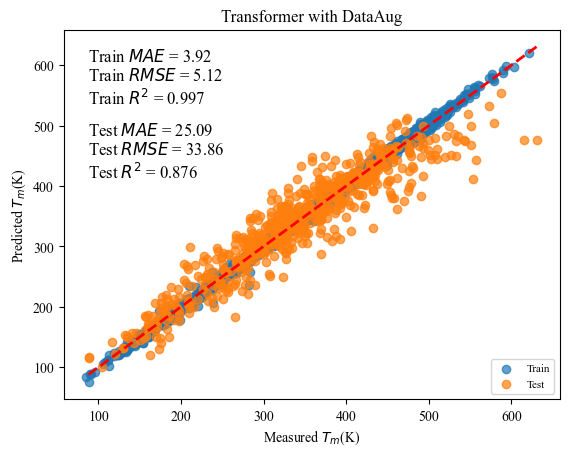

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


df_train = pd.read_csv('training_results/MP/TF W DA/traindata_predictions_tf.csv')
df_test = pd.read_csv('training_results/MP/TF W DA/testdata_predictions_tf.csv')


df_train_mean = df_train.groupby(df_train.index // 10)['Predicted Value'].mean().reset_index()
df_test_mean = df_test.groupby(df_test.index // 10)['Predicted Value'].mean().reset_index()
df_train_mean['Experimental Value'] = df_train.groupby(df_train.index // 10)['Experimental Value'].mean()
df_test_mean['Experimental Value'] = df_test.groupby(df_test.index // 10)['Experimental Value'].mean()

print(len(df_train_mean),len(df_test_mean))

mae_train = mean_absolute_error(df_train_mean['Experimental Value'], df_train_mean['Predicted Value'])
rmse_train = np.sqrt(mean_squared_error(df_train_mean['Experimental Value'], df_train_mean['Predicted Value']))
r2_train = r2_score(df_train_mean['Experimental Value'], df_train_mean['Predicted Value'])

mae_test = mean_absolute_error(df_test_mean['Experimental Value'], df_test_mean['Predicted Value'])
rmse_test = np.sqrt(mean_squared_error(df_test_mean['Experimental Value'], df_test_mean['Predicted Value']))
r2_test = r2_score(df_test_mean['Experimental Value'], df_test_mean['Predicted Value'])

df_test_mean['MAE'] = abs(df_test_mean['Experimental Value'] - df_test_mean['Predicted Value'])
df_sorted = df_test_mean.sort_values('MAE', ascending=False)
top_10_mae = df_sorted.head(10)
print(top_10_mae)

fig, ax = plt.subplots()
ax.scatter(df_train_mean['Experimental Value'], df_train_mean['Predicted Value'], label='Train', alpha=0.7)
ax.scatter(df_test_mean['Experimental Value'], df_test_mean['Predicted Value'], label='Test', alpha=0.7)

ax.plot([df_test_mean['Experimental Value'].min(), df_test_mean['Experimental Value'].max()],
        [df_test_mean['Experimental Value'].min(), df_test_mean['Experimental Value'].max()], 'r--', lw=2)

ax.set_xlabel('Measured $T_m$(K)')
ax.set_ylabel('Predicted $T_m$(K)')
ax.text(0.05, 0.95, f"Train $MAE$ = {mae_train:.2f}\nTrain $RMSE$ = {rmse_train:.2f}\nTrain $R^2$ = {r2_train:.3f}", fontsize=12, transform=ax.transAxes, verticalalignment='top')
ax.text(0.05, 0.75, f"Test $MAE$ = {mae_test:.2f}\nTest $RMSE$ = {rmse_test:.2f}\nTest $R^2$ = {r2_test:.3f}", fontsize=12, transform=ax.transAxes, verticalalignment='top')
ax.set_title('Transformer with DataAug')
ax.legend(loc='lower right', fontsize=8)

plt.savefig('TF W DA(MP_test).png', dpi=600)  
plt.show()

3.GNN

     Experimental Value  Predicted Value        MAE
224           576.00000        360.54617  215.45383
89            419.00000        235.06805  183.93195
49            526.00000        349.72806  176.27194
43            331.50000        505.74237  174.24237
45            431.00000        259.48706  171.51294
32            451.00000        298.03574  152.96426
178           603.50000        455.21545  148.28455
25            452.00000        305.12810  146.87190
62            182.19998        323.44370  141.24372
82            510.00000        374.16510  135.83490


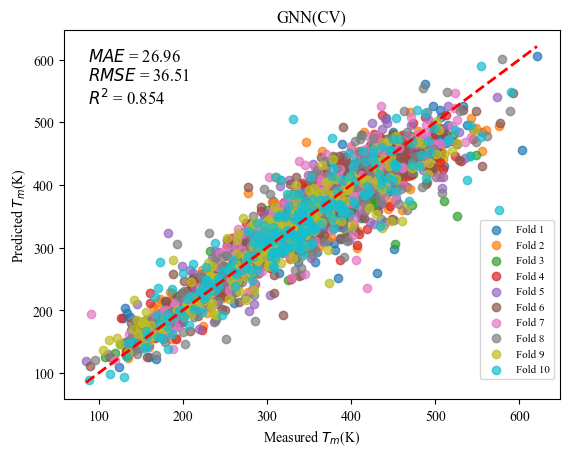

In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.DataFrame()
for i in range(1, 11):
    filename = f"training_results/MP/GNN/fold_{i}_predictions_gnn.csv"
    fold_df = pd.read_csv(filename)
    df = pd.concat([df, fold_df])


mae = mean_absolute_error(df['Experimental Value'], df['Predicted Value'])
rmse = np.sqrt(mean_squared_error(df['Experimental Value'], df['Predicted Value']))
r2 = r2_score(df['Experimental Value'], df['Predicted Value'])

df['MAE'] = abs(df['Experimental Value'] - df['Predicted Value'])
df_sorted = df.sort_values('MAE', ascending=False)
top_10_mae = df_sorted.head(10)
print(top_10_mae)

fig, ax = plt.subplots()
for i in range(1, 11):
    fold_df = pd.read_csv(f"training_results/MP/GNN/fold_{i}_predictions_gnn.csv")
    ax.scatter(fold_df['Experimental Value'], fold_df['Predicted Value'], label=f'Fold {i}', alpha=0.7)

ax.plot([df['Experimental Value'].min(), df['Experimental Value'].max()],
        [df['Experimental Value'].min(), df['Experimental Value'].max()], 'r--', lw=2)
ax.set_xlabel('Measured $T_m$(K)')
ax.set_ylabel('Predicted $T_m$(K)')

ax.text(0.05, 0.95, f"$MAE$ = {mae:.2f}\n$RMSE$ = {rmse:.2f}\n$R^2$ = {r2:.3f}", fontsize=12, transform=ax.transAxes, verticalalignment='top')

ax.set_title('GNN(CV)')

ax.legend(bbox_to_anchor=(1, 0.5), fontsize=8)

plt.savefig('GNN(MP_CV).png', dpi=600)  
plt.show()

     Experimental Value  Predicted Value        MAE
542               631.0        494.58203  136.41797
296               615.0        485.02536  129.97464
494               323.0        194.91070  128.08930
37                432.0        306.65164  125.34836
123               469.5        349.59990  119.90010
474               557.0        439.12274  117.87726
374               293.5        408.19690  114.69690
319               369.0        255.68200  113.31800
118               533.5        421.20953  112.29047
578               474.0        583.27277  109.27277


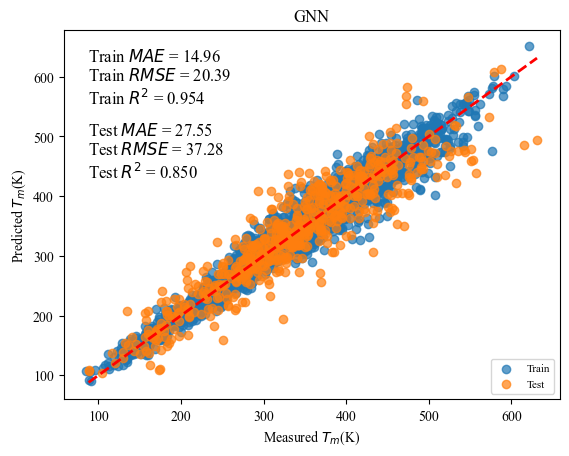

In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


df_train = pd.read_csv('training_results/MP/GNN/traindata_predictions_gnn.csv')
df_test = pd.read_csv('training_results/MP/GNN/testdata_predictions_gnn.csv')


mae_train = mean_absolute_error(df_train['Experimental Value'], df_train['Predicted Value'])
rmse_train = np.sqrt(mean_squared_error(df_train['Experimental Value'], df_train['Predicted Value']))
r2_train = r2_score(df_train['Experimental Value'], df_train['Predicted Value'])

mae_test = mean_absolute_error(df_test['Experimental Value'], df_test['Predicted Value'])
rmse_test = np.sqrt(mean_squared_error(df_test['Experimental Value'], df_test['Predicted Value']))
r2_test = r2_score(df_test['Experimental Value'], df_test['Predicted Value'])

df_test['MAE'] = abs(df_test['Experimental Value'] - df_test['Predicted Value'])
df_sorted = df_test.sort_values('MAE', ascending=False)
top_10_mae = df_sorted.head(10)
print(top_10_mae)

fig, ax = plt.subplots()
ax.scatter(df_train['Experimental Value'], df_train['Predicted Value'], label='Train', alpha=0.7)
ax.scatter(df_test['Experimental Value'], df_test['Predicted Value'], label='Test', alpha=0.7)

ax.plot([df_test['Experimental Value'].min(), df_test['Experimental Value'].max()],
        [df_test['Experimental Value'].min(), df_test['Experimental Value'].max()], 'r--', lw=2)

ax.set_xlabel('Measured $T_m$(K)')
ax.set_ylabel('Predicted $T_m$(K)')
ax.text(0.05, 0.95, f"Train $MAE$ = {mae_train:.2f}\nTrain $RMSE$ = {rmse_train:.2f}\nTrain $R^2$ = {r2_train:.3f}", fontsize=12, transform=ax.transAxes, verticalalignment='top')
ax.text(0.05, 0.75, f"Test $MAE$ = {mae_test:.2f}\nTest $RMSE$ = {rmse_test:.2f}\nTest $R^2$ = {r2_test:.3f}", fontsize=12, transform=ax.transAxes, verticalalignment='top')
ax.set_title('GNN')
ax.legend(loc='lower right', fontsize=8)

plt.savefig('GNN(MP_test).png', dpi=600)  
plt.show()


4.Prediction

In [5]:
import torch
import pandas as pd
from model import Transformer,AttentiveFP
import yaml
from dataset import SMILES_dataset,Graph_dataset
from tokenizer import SMILESTokenizer
from torch_geometric.loader import DataLoader
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from rdkit import Chem



def randomize_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        new_smiles_list = []
        for i in range(10):  
            new_smiles = Chem.MolToSmiles(mol, doRandom=True)
            new_smiles_list.append(new_smiles)
        return new_smiles_list
    else:
        return [smiles] * 10


class Normalizer(object):
    """Normalize a Tensor and restore it later. """

    def __init__(self, tensor):
        """tensor is taken as a sample to calculate the mean and std"""
        self.mean = torch.mean(tensor)
        self.std = torch.std(tensor)

    def norm(self, tensor):
        return (tensor - self.mean) / self.std

    def denorm(self, normed_tensor):
        return normed_tensor * self.std + self.mean

    def state_dict(self):
        return {'mean': self.mean,
                'std': self.std}

    def load_state_dict(self, state_dict):
        self.mean = state_dict['mean']
        self.std = state_dict['std']


def predict_csv(input_path,output_path,model_name,config,device):
    
    df = pd.read_csv(input_path)

    if model_name=='tf':
        expanded_rows = []
        for index, row in df.iterrows():
            smiles = row['SMILES']  
            expanded_smiles = randomize_smiles(smiles)

            for new_smiles in expanded_smiles:
                new_row = row.copy()
                new_row['SMILES'] = new_smiles  
                expanded_rows.append(new_row)

        expanded_df = pd.concat([pd.DataFrame([row]) for row in expanded_rows], ignore_index=True)


        dataset = SMILES_dataset(df=expanded_df, tokenizer=SMILESTokenizer(config['vocab_path'], model_max_length=128, padding_side='right'), target='MP_K')
        model = Transformer(**config["transformer"]).to(device)
        model.load_state_dict(torch.load("model_weight/tf/TF W DA for MP/best_tf_model.pth"))
        model.eval()

        normalizer = Normalizer(torch.tensor([0], dtype=torch.float32))
        normalizer.load_state_dict(state_dict = {'mean': 334.9653, 'std': 95.5714})   #TF W DA   tensor(334.9653) tensor(95.5714) torch.Size([24300, 1, 1])

        loader = DataLoader(dataset, batch_size=config['batch_size'], shuffle=False)

        y, pred = [], []

        with torch.no_grad():
            for datas, label in loader:
                data = [data.to(device) for data in datas]
                label = label.to(device)
                label = normalizer.norm(label)
                output = model(data)

                label = normalizer.denorm(label)
                output = normalizer.denorm(output)

                y.extend(label.detach().cpu().numpy())
                pred.extend(output.detach().cpu().numpy())

        y, pred = np.array(y).flatten(), np.array(pred).flatten()
        df_results = pd.DataFrame({'Experimental Value': y, 'Predicted Value': pred})


        experimental_values = []
        predicted_values = []

        for i in range(0, len(df_results), 10):
            predicted_value = df_results['Predicted Value'][i:i+10]
            experimental_value = df_results['Experimental Value'][i:i+10]

            if len(set(experimental_value)) == 1:
                experimental_value = experimental_value.sample(n=1).values[0]
            else:
                print("Error: Experimental values are not the same in this group!")
                continue

            predicted_value_mean = np.mean(predicted_value)
            experimental_values.append(experimental_value)
            predicted_values.append(predicted_value_mean)

    elif model_name=='gnn':

        dataset = Graph_dataset(df, target='MP_K')
        model = AttentiveFP(**config["gnn"]).to(device)
        model.load_state_dict(torch.load("model_weight/gnn/GNN for MP/best_gnn_model.pth"))
        model.eval()

        normalizer = Normalizer(torch.tensor([0], dtype=torch.float32))
        normalizer.load_state_dict(state_dict = {'mean': 334.9653, 'std': 95.5891})   #GNN tensor(334.9653) tensor(95.5891) torch.Size([2430, 1, 1])

        loader = DataLoader(dataset, batch_size=config['batch_size'], shuffle=False)

        experimental_values = []
        predicted_values = []

        with torch.no_grad():
            for datas, label in loader:

                datas, label = datas.to(device), label.to(device)
                label = normalizer.norm(label)
                output = model(datas)

                label = normalizer.denorm(label)
                output = normalizer.denorm(output)

                experimental_values.extend(label.detach().cpu().numpy())
                predicted_values.extend(output.detach().cpu().numpy())

            experimental_values, predicted_values = np.array(experimental_values).flatten(), np.array(predicted_values).flatten()

    else:
        print('Error for model name!')

    dfs = pd.DataFrame()
    dfs['Experimental Values'] = experimental_values
    dfs['Predicted Values'] = predicted_values
    mae = mean_absolute_error(experimental_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(experimental_values, predicted_values))
    r2 = r2_score(experimental_values, predicted_values)

    df_with_results = pd.concat([df, dfs], axis=1)
    df_with_results.to_csv(output_path, index=False)

    return mae, rmse, r2



config = yaml.load(open("config_MP.yaml", "r"), Loader=yaml.FullLoader)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


input_path='MP_data/test_MP.csv'
output_path='training_results/predictions.csv'
model_name='gnn'


MAE,RMSE,R2=predict_csv(input_path,output_path,model_name,config,device)
print(f"Mean Absolute Error (MAE): {MAE}")
print(f"Root Mean Squared Error (RMSE): {RMSE}")
print(f"R-squared (R2) Score: {R2}")

----info----
data_length 608
------------
Mean Absolute Error (MAE): 27.550806045532227
Root Mean Squared Error (RMSE): 37.279701232910156
R-squared (R2) Score: 0.8497916909455085
